In [1]:
from os import listdir
from os.path import isfile, join

import seaborn as sns
import matplotlib.pyplot as plt
from utils.rodents_routine import _sigmoid_scalar, params_to_P_scalar, params_to_w_scalar, params_to_heter_scalar
J_scale = 126.5
params_to_J_scalar = lambda x: _sigmoid_scalar(x, 1, J_scale)
import pandas as pd

In [2]:
plt.rcParams.update({'font.size': 22})
sns.set(font_scale=2.4)

In [3]:
path = r"/Users/paopao_ch/Documents/projects/v1_modelling/results/actual_data/method_validation_nes_actual"
files = [f for f in listdir(path) if isfile(join(path, f))]

In [4]:
# files

In [5]:

data = []
lowest_loss = 10000
lowest_file = ""
for file in files:
    with open(f"{path}/{file}", 'r') as f:
        lines = []
        index = 0
        for i, line in enumerate(f):
            if line[0:11] == "Final mean:":
                index = i
            lines.append(line)

    mean_tensor = lines[index + 1].strip() + lines[index + 2].strip()
    mean = eval(mean_tensor.replace("tensor(", "").replace(", device='cuda:1')", "").replace(", device='cuda:0')", ""))
    if len(mean) != 13:
        continue
    loss = eval(lines[index - 2].strip().replace("tensor(", "").replace(", device='cuda:1')", "").replace(", device='cuda:0')", ""))
    if loss < lowest_loss:
        lowest_loss = loss
        lowest_file = file
    datum = {"$J_{EE}$": params_to_J_scalar(mean[0]) / (8000 ** 0.5), 
                "$J_{EI}$": params_to_J_scalar(mean[1]) / (2000 ** 0.5), 
                "$J_{IE}$": params_to_J_scalar(mean[2]) / (8000 ** 0.5),
                "$J_{II}$": params_to_J_scalar(mean[3]) / (2000 ** 0.5),
                "$P_{EE}$": params_to_P_scalar(mean[4]),
                "$P_{EI}$": params_to_P_scalar(mean[5]),
                "$P_{IE}$": params_to_P_scalar(mean[6]),
                "$P_{II}$": params_to_P_scalar(mean[7]),
                "$w_{EE}$": params_to_w_scalar(mean[8]),
                "$w_{EI}$": params_to_w_scalar(mean[9]),
                "$w_{IE}$": params_to_w_scalar(mean[10]),
                "$w_{II}$": params_to_w_scalar(mean[11]),
                "$q_{ff}$": params_to_heter_scalar(mean[12]),
                "loss": loss}
    data.append(datum)

print(lowest_file)
print(lowest_loss)

log_nes_run_1716368921.2877905
0.8535


In [6]:
[ 0.8031,  0.0952,  1.8234,  0.3603,  
 2.9309, -0.2961,  2.0060, -0.0998, -1.3264, 
 3.3356,  0.5527,  3.3324, -0.8895,]

[0.8031,
 0.0952,
 1.8234,
 0.3603,
 2.9309,
 -0.2961,
 2.006,
 -0.0998,
 -1.3264,
 3.3356,
 0.5527,
 3.3324,
 -0.8895]

In [7]:
# Lowest
J_array = [params_to_J_scalar(0.8031) / (8000 ** 0.5), params_to_J_scalar(0.0952) / (2000 ** 0.5), params_to_J_scalar(1.8234) / (8000 ** 0.5), params_to_J_scalar(0.3603) / (2000 ** 0.5)]
P_array = [params_to_P_scalar(2.9309), params_to_P_scalar(-0.2961), params_to_P_scalar(2.0060), params_to_P_scalar(-0.0998), params_to_heter_scalar(-1.3264)]
w_array = [params_to_w_scalar(3.3356), params_to_w_scalar(0.5527), params_to_w_scalar(3.3324), params_to_w_scalar(-0.8895)]

In [8]:
df = pd.DataFrame(data)
print(len(df))
for datum in data[:5]:
    print(datum)
df.head()

49
{'$J_{EE}$': 0.037561588665678096, '$J_{EI}$': 0.0695774939337936, '$J_{IE}$': 0.4175231409650648, '$J_{II}$': 2.7034184917639767, '$P_{EE}$': 0.019014941035950497, '$P_{EI}$': 0.2593024489028677, '$P_{IE}$': 0.532454739582436, '$P_{II}$': 0.1562158027249319, '$w_{EE}$': 45.91438661367656, '$w_{EI}$': 62.36428225252134, '$w_{IE}$': 147.1660902657364, '$w_{II}$': 154.34165886740777, '$q_{ff}$': 0.9806419679468618, 'loss': 0.889}
{'$J_{EE}$': 0.041905690695010316, '$J_{EI}$': 1.5350131559183415, '$J_{IE}$': 0.3357546188813803, '$J_{II}$': 2.798886467791059, '$P_{EE}$': 0.5546404782092726, '$P_{EI}$': 0.11335595776849186, '$P_{IE}$': 0.40593501394761233, '$P_{II}$': 0.20816633202803234, '$w_{EE}$': 176.35484770879984, '$w_{EI}$': 24.95803516703761, '$w_{IE}$': 0.4726630516632482, '$w_{II}$': 33.241209551445074, '$q_{ff}$': 0.09773927995833508, 'loss': 2.015}
{'$J_{EE}$': 1.3740584079162255, '$J_{EI}$': 0.39051919199039103, '$J_{IE}$': 0.7118590192763593, '$J_{II}$': 2.4646762646812097,

,$J_{EE}$,$J_{EI}$,$J_{IE}$,$J_{II}$,$P_{EE}$,$P_{EI}$,$P_{IE}$,$P_{II}$,$w_{EE}$,$w_{EI}$,$w_{IE}$,$w_{II}$,$q_{ff}$,loss
0,0.037562,0.069577,0.417523,2.703418,0.019015,0.259302,0.532455,0.156216,45.914387,62.364282,147.166090,154.341659,0.980642,0.8890
1,0.041906,1.535013,0.335755,2.798886,0.554640,0.113356,0.405935,0.208166,176.354848,24.958035,0.472663,33.241210,0.097739,2.0150
2,1.374058,0.390519,0.711859,2.464676,0.007138,0.070203,0.522179,0.534612,7.767477,77.985149,89.235018,29.150759,0.920664,0.9066
3,0.976777,1.481583,1.217686,1.666380,0.569612,0.255907,0.528855,0.285042,173.813420,114.257121,173.794275,52.418344,0.209755,0.8535
4,0.024877,0.948760,0.000284,2.815925,0.599273,0.087258,0.035778,0.542417,0.036786,168.549542,179.237071,42.361200,0.057146,1.0333


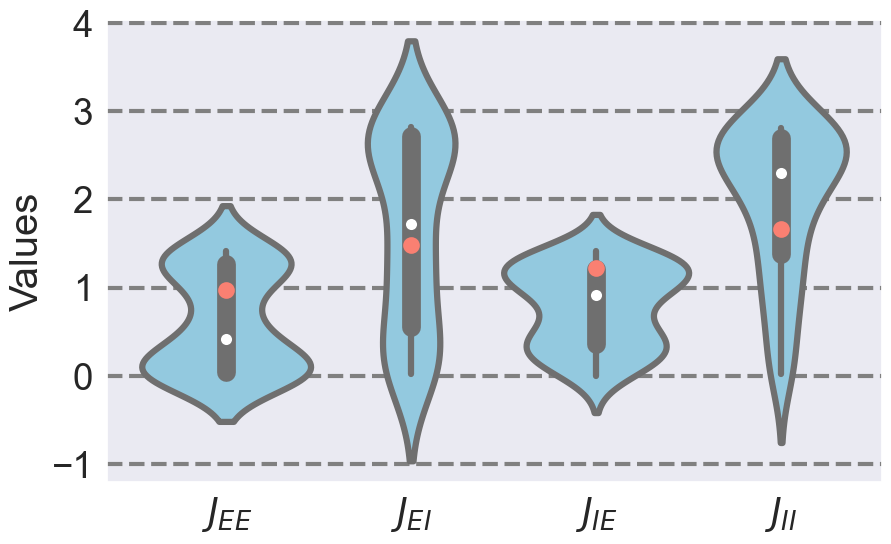

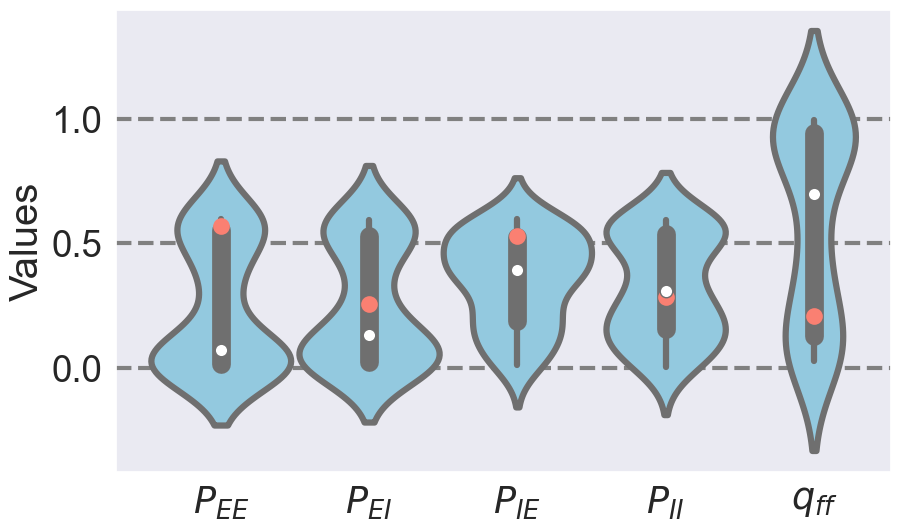

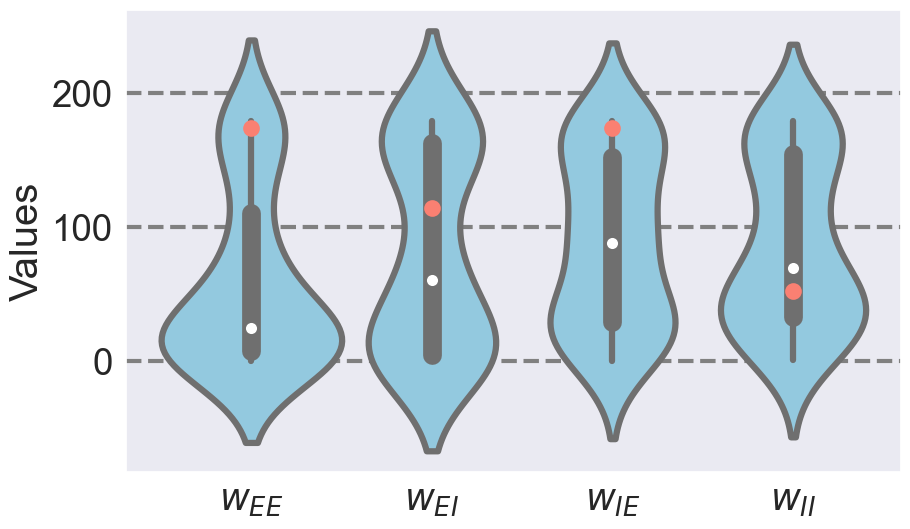

In [9]:
width = 1
linewidth = 4.5
linewidth_grid = 3

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$J_{EE}$", "$J_{EI}$", "$J_{IE}$", "$J_{II}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
for i, ground_truth in enumerate(J_array):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$P_{EE}$", "$P_{EI}$", "$P_{IE}$", "$P_{II}$", "$q_{ff}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
for i, ground_truth in enumerate(P_array):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$w_{EE}$", "$w_{EI}$", "$w_{IE}$", "$w_{II}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
for i, ground_truth in enumerate(w_array):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

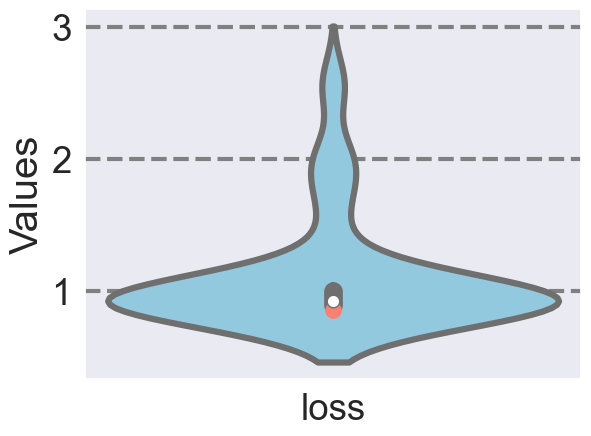

In [10]:
ax = sns.violinplot(data=df[["loss"]], color='skyblue', linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [0.8535]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', color='gray', linewidth=linewidth_grid)
plt.xlabel('')
plt.ylabel('Values')
plt.show()

In [11]:
df.median()

$J_{EE}$     0.418878
$J_{EI}$     1.716963
$J_{IE}$     0.914130
$J_{II}$     2.301724
$P_{EE}$     0.070545
$P_{EI}$     0.133724
$P_{IE}$     0.395030
$P_{II}$     0.309687
$w_{EE}$    24.596942
$w_{EI}$    60.330339
$w_{IE}$    88.011324
$w_{II}$    69.235184
$q_{ff}$     0.700630
loss         0.927700
dtype: float64

In [12]:
# J_array = list(df[["$J_{EE}$", "$J_{EI}$", "$J_{IE}$", "$J_{II}$"]].median())
# P_array = list(df[["$P_{EE}$", "$P_{EI}$", "$P_{IE}$", "$P_{II}$"]].median())
# w_array = list(df[["$w_{EE}$", "$w_{EI}$", "$w_{IE}$", "$w_{II}$"]].median())
# heter_ff = list(df[["$q_{ff}$"]].median())

# print(J_array)
# print(P_array)
# print(w_array)
# print(heter_ff)

In [13]:
from scipy.special import i0
from math import exp

def get_K(P, w, Nb):
    bessel = i0(1 / (4 * w**2))
    return P * Nb * exp(-1 / (4 * w**2)) * bessel

balance = {
    "$K_{EE}$": [],
    "$K_{EI}$": [],
    "$K_{IE}$": [],
    "$K_{II}$": [],
}

for datum in data:
    balance["$K_{EE}$"].append(get_K(datum["$P_{EE}$"], datum["$w_{EE}$"], 8000))
    balance["$K_{EI}$"].append(get_K(datum["$P_{EI}$"], datum["$w_{EI}$"], 2000))
    balance["$K_{IE}$"].append(get_K(datum["$P_{IE}$"], datum["$w_{IE}$"], 8000))
    balance["$K_{II}$"].append(get_K(datum["$P_{II}$"], datum["$w_{II}$"], 2000))

balance_df = pd.DataFrame(balance)

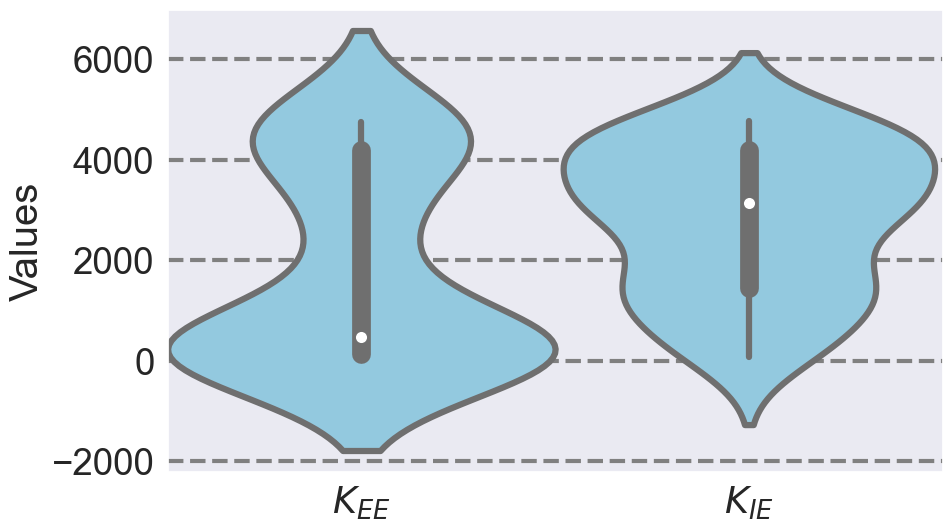

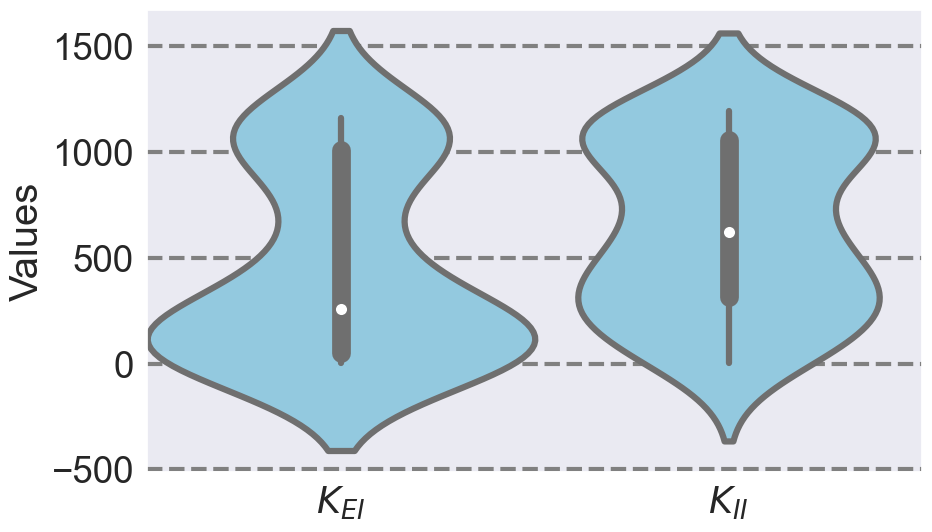

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=balance_df[["$K_{EE}$", "$K_{IE}$"]], color='skyblue', width=1, linewidth=linewidth)  # Use inner="points" to show the individual data points
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=balance_df[["$K_{EI}$", "$K_{II}$"]], color='skyblue', width=1, linewidth=linewidth)  # Use inner="points" to show the individual data points
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

In [110]:
# FURTHER INVESTIGATION

data = []
lowest_loss = 10000
lowest_file = ""
for file in files:
    with open(f"{path}/{file}", 'r') as f:
        lines = []
        index = 0
        for i, line in enumerate(f):
            if line[0:11] == "Final mean:":
                index = i
            lines.append(line)

    mean_tensor = lines[index + 1].strip() + lines[index + 2].strip()
    mean = eval(mean_tensor.replace("tensor(", "").replace(", device='cuda:1')", "").replace(", device='cuda:0')", ""))
    if len(mean) != 13:
        continue
    loss = eval(lines[index - 2].strip().replace("tensor(", "").replace(", device='cuda:1')", "").replace(", device='cuda:0')", ""))
    if loss < lowest_loss:
        lowest_loss = loss
        lowest_file = file

    K_EE = get_K(params_to_P_scalar(mean[4]), params_to_w_scalar(mean[8]), 8000)
    K_EI = get_K(params_to_P_scalar(mean[5]), params_to_w_scalar(mean[9]), 2000)
    K_IE = get_K(params_to_P_scalar(mean[6]), params_to_w_scalar(mean[10]), 8000)
    K_II = get_K(params_to_P_scalar(mean[7]), params_to_w_scalar(mean[11]), 2000)

    # if K_EE < 2000 and K_EI < 500 and K_IE < 2000 and K_II < 500:  # loose
    # if K_EE > 2000 and K_EI > 500 and K_IE > 2000 and K_II > 500:  # tight
    # if (    params_to_P_scalar(mean[4]) < 0.4 
    #     # and params_to_P_scalar(mean[5]) < 0.4 
    #     and params_to_P_scalar(mean[6]) < 0.4): 
    #     # and params_to_P_scalar(mean[7]) < 0.4):
    if True:
    # if K_IE > 2000 and K_II > 500:

        datum = {"$J_{EE}$": params_to_J_scalar(mean[0]) / (8000 ** 0.5), 
                    "$J_{EI}$": params_to_J_scalar(mean[1]) / (2000 ** 0.5), 
                    "$J_{IE}$": params_to_J_scalar(mean[2]) / (8000 ** 0.5),
                    "$J_{II}$": params_to_J_scalar(mean[3]) / (2000 ** 0.5),
                    "$P_{EE}$": params_to_P_scalar(mean[4]),
                    "$P_{EI}$": params_to_P_scalar(mean[5]),
                    "$P_{IE}$": params_to_P_scalar(mean[6]),
                    "$P_{II}$": params_to_P_scalar(mean[7]),
                    "$w_{EE}$": params_to_w_scalar(mean[8]),
                    "$w_{EI}$": params_to_w_scalar(mean[9]),
                    "$w_{IE}$": params_to_w_scalar(mean[10]),
                    "$w_{II}$": params_to_w_scalar(mean[11]),
                    "$q_{ff}$": params_to_heter_scalar(mean[12]),
                    

                    "$K_{EE}$": get_K(params_to_P_scalar(mean[4]), params_to_w_scalar(mean[8]), 8000),
                    "$K_{EI}$": get_K(params_to_P_scalar(mean[5]), params_to_w_scalar(mean[9]), 2000),
                    "$K_{IE}$": get_K(params_to_P_scalar(mean[6]), params_to_w_scalar(mean[10]), 8000),
                    "$K_{II}$": get_K(params_to_P_scalar(mean[7]), params_to_w_scalar(mean[11]), 2000),


                    "loss": loss}
        
        data.append(datum)

print(lowest_file)
print(lowest_loss)

df = pd.DataFrame(data)
print(len(df))
for datum in data[:5]:
    print(datum)
df.head()

log_nes_run_1716368921.2877905
0.8535
17
{'$J_{EE}$': 1.2604964089797162, '$J_{EI}$': 2.1917595588649776, '$J_{IE}$': 1.2683606042847761, '$J_{II}$': 2.214268313815563, '$P_{EE}$': 0.029157532460653498, '$P_{EI}$': 0.024012763502545345, '$P_{IE}$': 0.16611490419380168, '$P_{II}$': 0.18642626741781557, '$w_{EE}$': 7.917488748708893, '$w_{EI}$': 177.79977841266944, '$w_{IE}$': 29.43279501265793, '$w_{II}$': 174.26672440531874, '$q_{ff}$': 0.9010726371077049, '$K_{EE}$': 232.33277278532702, '$K_{EI}$': 48.02514721192858, '$K_{IE}$': 1328.5358075227605, '$K_{II}$': 372.84946549215437, 'loss': 0.8844}
{'$J_{EE}$': 0.7496055069615184, '$J_{EI}$': 2.5637104935454875, '$J_{IE}$': 0.35265417145858924, '$J_{II}$': 0.7191097189693956, '$P_{EE}$': 0.026389106200847706, '$P_{EI}$': 0.07987543308013358, '$P_{IE}$': 0.2393328859619775, '$P_{II}$': 0.055182750645629705, '$w_{EE}$': 22.70773539601076, '$w_{EI}$': 6.392324754010386, '$w_{IE}$': 12.220907204356193, '$w_{II}$': 161.57564512541455, '$q_{ff

,$J_{EE}$,$J_{EI}$,$J_{IE}$,$J_{II}$,$P_{EE}$,$P_{EI}$,$P_{IE}$,$P_{II}$,$w_{EE}$,$w_{EI}$,$w_{IE}$,$w_{II}$,$q_{ff}$,$K_{EE}$,$K_{EI}$,$K_{IE}$,$K_{II}$,loss
0,1.260496,2.191760,1.268361,2.214268,0.029158,0.024013,0.166115,0.186426,7.917489,177.799778,29.432795,174.266724,0.901073,232.332773,48.025147,1328.535808,372.849465,0.8844
1,0.749606,2.563710,0.352654,0.719110,0.026389,0.079875,0.239333,0.055183,22.707735,6.392325,12.220907,161.575645,0.034185,211.010532,158.777951,1911.462126,110.364444,0.9720
2,1.332948,2.599563,0.562492,0.674176,0.016788,0.005834,0.049335,0.573363,1.150212,4.892960,126.636733,0.806755,0.177687,112.172028,11.546603,394.671265,810.057435,1.7389
3,1.096324,1.099541,0.614559,2.780350,0.033268,0.029574,0.395030,0.186696,4.741539,147.460351,81.948583,172.190048,0.958170,263.206684,59.146637,3160.124425,373.389308,0.8847
4,0.044597,0.187462,0.065023,2.042379,0.018044,0.133786,0.160141,0.020574,137.261900,179.105175,175.737768,69.235184,0.998106,144.347512,267.570590,1281.117201,41.146244,0.9088


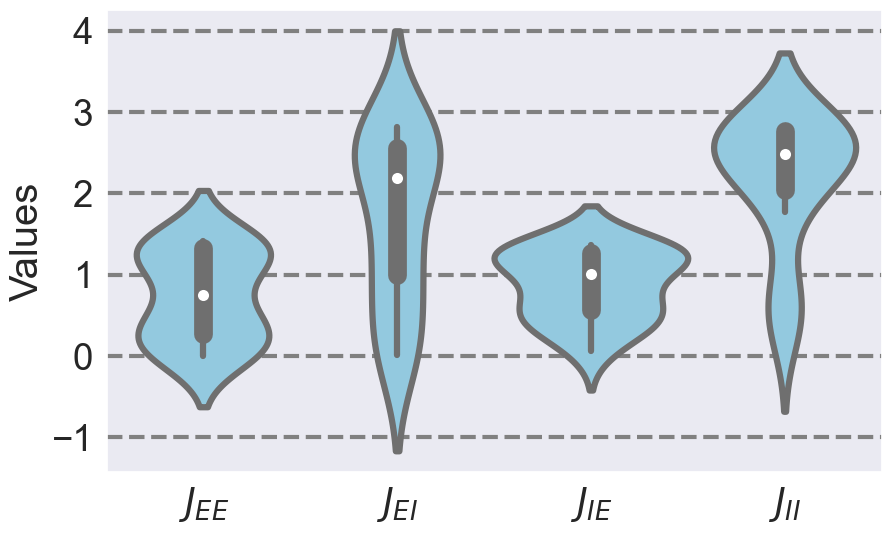

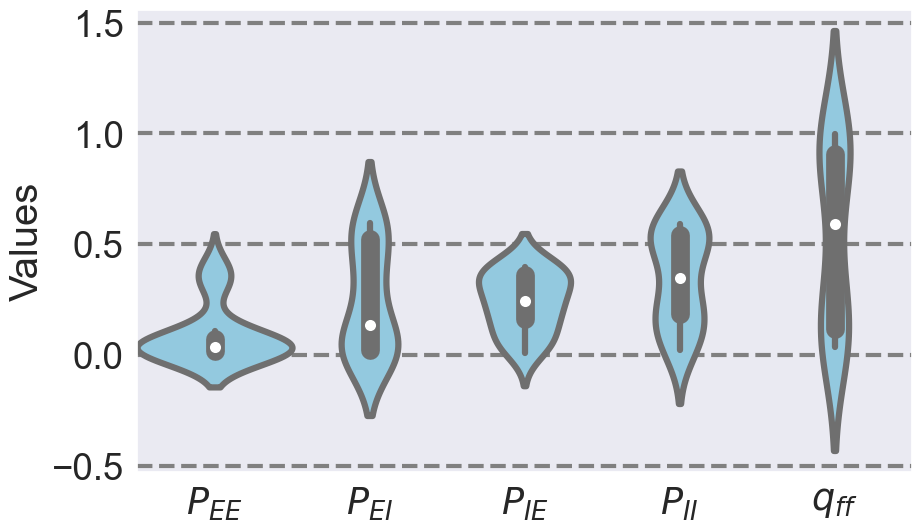

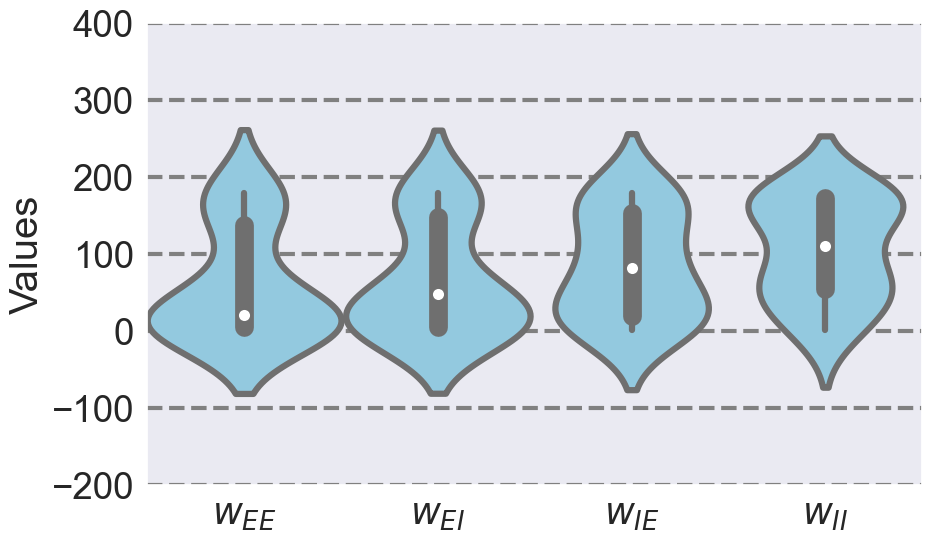

In [111]:
width = 1
linewidth = 4.5
linewidth_grid = 3

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$J_{EE}$", "$J_{EI}$", "$J_{IE}$", "$J_{II}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
# for i, ground_truth in enumerate(J_array):
#     ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$P_{EE}$", "$P_{EI}$", "$P_{IE}$", "$P_{II}$", "$q_{ff}$"]], color='skyblue', width=1, linewidth=linewidth)  # Use inner="points" to show the individual data points
# for i, ground_truth in enumerate(P_array):
#     ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$w_{EE}$", "$w_{EI}$", "$w_{IE}$", "$w_{II}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
# for i, ground_truth in enumerate(w_array):
#     ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.ylim(-200, 400)
plt.show()

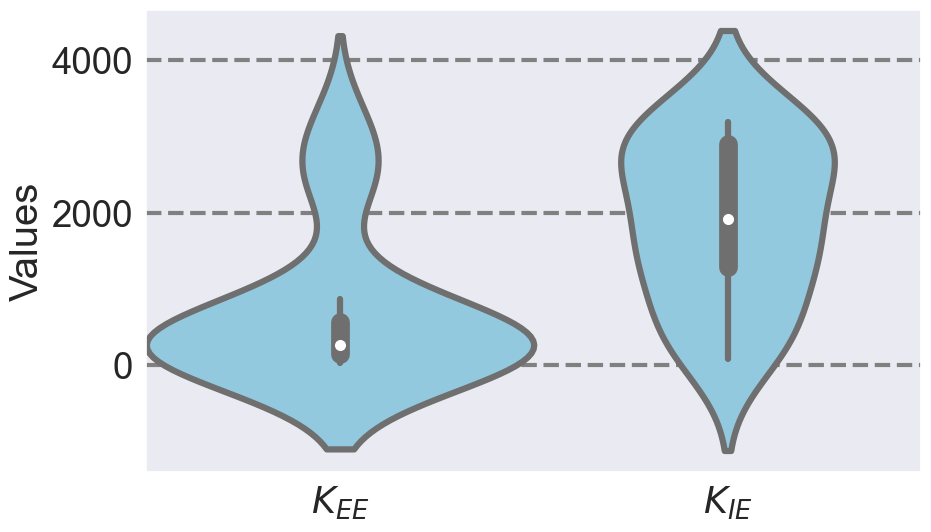

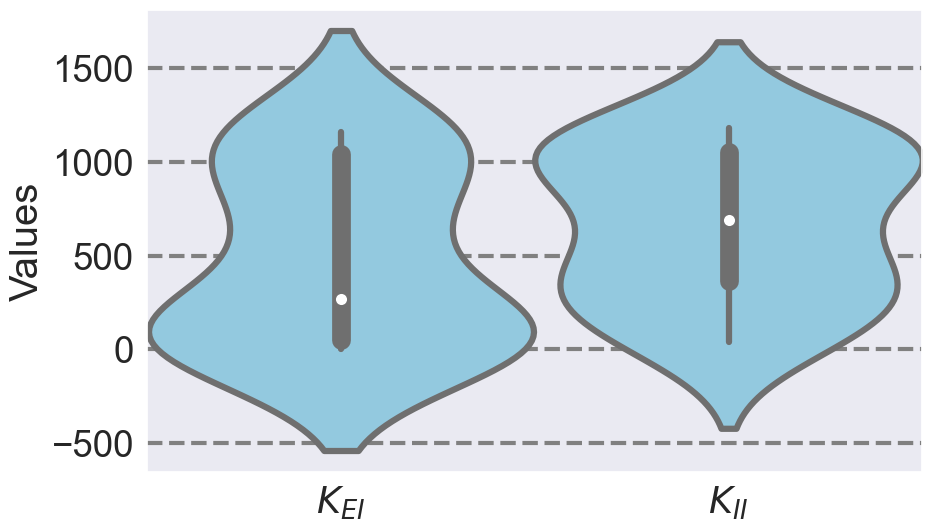

In [112]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$K_{EE}$", "$K_{IE}$"]], color='skyblue', width=1, linewidth=linewidth)  # Use inner="points" to show the individual data points
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$K_{EI}$", "$K_{II}$"]], color='skyblue', width=1, linewidth=linewidth)  # Use inner="points" to show the individual data points
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()